### Objective of the Titanic Survival Prediction Project

The objective of this project is to build a predictive model that can determine whether a passenger on the Titanic survived or not, based on various features available in the dataset. The dataset includes information such as the passenger's age, gender, class, fare, and other details.

The steps involved in the project include:

1. **Data Preprocessing**: Clean and prepare the dataset by handling missing values, encoding categorical variables, and transforming the data into a format suitable for modeling.
2. **Model Training**: Train a machine learning model (such as Random Forest, Logistic Regression, etc.) using the features in the dataset to predict the target variable (`Survived`).
3. **Model Evaluation**: Evaluate the model’s performance using appropriate metrics such as accuracy, precision, recall, and confusion matrix to assess how well the model is predicting survival.
4. **Model Improvement**: Experiment with different machine learning algorithms, fine-tune hyperparameters, and perform feature selection to improve the model’s accuracy.

The goal is to predict the likelihood of survival based on the characteristics of the passengers, which can be applied to similar datasets for survival prediction or analysis of other historical events.


1. Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


2. Load the Dataset

In [9]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()  # View the first few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Titanic Dataset Description

The dataset contains the following columns:

- **PassengerId**: Unique ID of each passenger.
- **Survived**: Target variable (0 = No, 1 = Yes).
- **Pclass**: Passenger class (1st = Upper, 2nd = Middle, 3rd = Lower).
- **Name**: Name of the passenger.
- **Sex**: Gender of the passenger (male, female).
- **Age**: Age of the passenger (in years).
- **SibSp**: Number of siblings or spouses aboard the Titanic.
- **Parch**: Number of parents or children aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Amount of money the passenger paid for the ticket.
- **Cabin**: Cabin number (may have missing values).
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()  # This shows missing values for each column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing Data

In the Titanic dataset, some columns contain missing values. The following strategies can be used to handle them:

1. **Age**:
   - **Strategy**: Use **median imputation** to fill missing values in the `Age` column.
   - **Reason**: Median imputation is preferred because age is a numerical variable and the median is less sensitive to outliers.

2. **Cabin**:
   - **Strategy**: You can either:
     - **Drop the `Cabin` column** due to a large number of missing values, or
     - **Create a new feature** to indicate whether the cabin is known (e.g., `HasCabin`), where missing values are marked as 0 (No Cabin) and non-missing values as 1 (Has Cabin).
   - **Reason**: The `Cabin` column has a large number of missing entries, which might not be useful for prediction.

3. **Embarked**:
   - **Strategy**: Use the **most frequent value (mode)** to impute missing values in the `Embarked` column.
   - **Reason**: The `Embarked` column is categorical, and imputing with the most frequent value ensures that the imputed value is representative of the majority of the data.

By following these strategies, you ensure that the dataset is clean and ready for building a predictive model.


In [13]:
# Impute Age with median
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])


In [14]:
# Drop 'Cabin' due to too many missing values
df = df.drop(columns=['Cabin'])



In [15]:
# Impute 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10740\929634915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


5. Feature Engineering

In [16]:
# Label encode 'Sex'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])




In [17]:
# One-Hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

6. Define Features and Target

In [18]:
# Features (dropping 'PassengerId', 'Survived', 'Name', 'Ticket')
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = df['Survived']


7. Split the Dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


8. Train the Model

In [20]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

9. Evaluate the Model

In [21]:
# Predictions on the test set
y_pred = model.predict(X_test)



In [22]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')




Accuracy: 81.01%


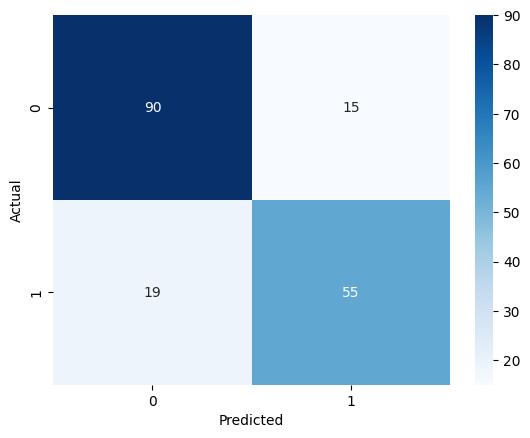

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()